In [1]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import utils

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

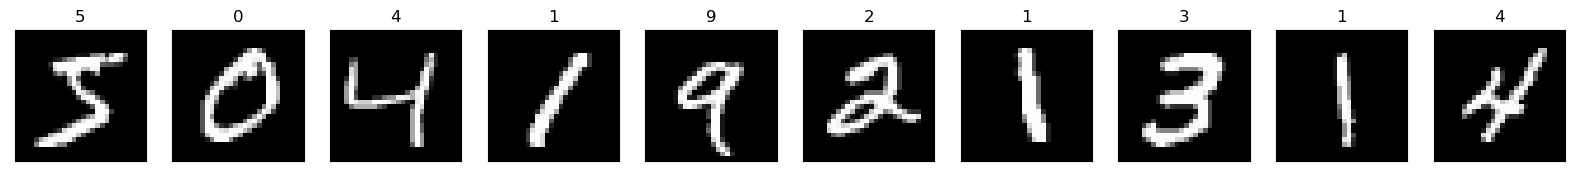

In [7]:
fig, axes = plt.subplots(ncols = 10, sharex = False,sharey = True, figsize = (20,4))

for i in range (10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_test.shape

(10000, 10)

In [10]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(10,activation = 'sigmoid'))
model.add(Dense(5,activation = 'sigmoid'))
model.add(Dense(10,activation = 'softmax'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


In [16]:
#!pip install graphviz
#!pip install pydot
#choco install graphviz
winget install -e --id Graphviz.Graphviz

SyntaxError: invalid syntax (4275480345.py, line 4)

In [17]:
utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [18]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['acc'])

In [19]:
history = model.fit(X_train , y_train, epochs = 20, validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7794 - acc: 0.3822 - val_loss: 1.4734 - val_acc: 0.4608
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3648 - acc: 0.5038 - val_loss: 1.2192 - val_acc: 0.6012
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1171 - acc: 0.6460 - val_loss: 1.0275 - val_acc: 0.6920
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9408 - acc: 0.7095 - val_loss: 0.8377 - val_acc: 0.7580
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8275 - acc: 0.7469 - val_loss: 0.7744 - val_acc: 0.7662
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7701 - acc: 0.7604 - val_loss: 0.7414 - val_acc: 0.7579
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7465 - acc: 0.7653 - val_loss: 0.6981 - val_acc: 0.7862
Epoch 8/20
1875/1875 [==============================] - 7s 4ms

In [20]:
model.save('mnist_model.h5')

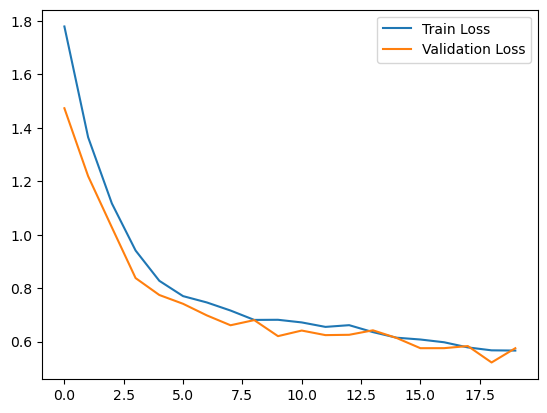

In [21]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()

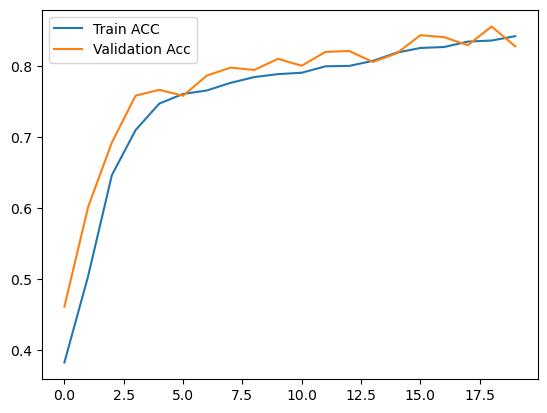

In [22]:
plt.plot(history.history['acc'], label = 'Train ACC')
plt.plot(history.history['val_acc'], label = 'Validation Acc')
plt.legend()

In [24]:
import keras

In [25]:
model = keras.models.load_model('mnist_model.h5')

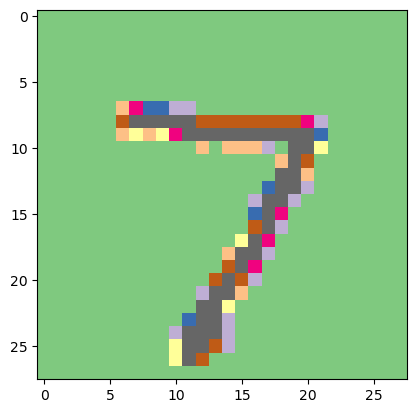

In [28]:
plt.imshow(X_test[0],cmap = 'Accent')

In [31]:
import numpy as np
x = np.reshape(X_test[0], (1,28,28))
np.argmax(model.predict(x))

1/1 [==============================] - 0s 153ms/step


7

In [32]:
model.predict(x)

1/1 [==============================] - 0s 26ms/step


array([[6.2375870e-03, 1.4949841e-06, 1.2932157e-02, 3.0318258e-04,
        1.8226501e-03, 6.4452225e-04, 6.1986857e-04, 9.6762520e-01,
        1.8370336e-04, 9.6296016e-03]], dtype=float32)